# *Auto Mobile Inusrance Analysis*

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os
import pymongo

---
## *Importing Data From MongoDB :*

*Import MongoDB Constant :*

In [3]:
from MongoDB_Constants import *
DB_NAME=DB_NAME
COLLECTION_NAME=COLLECTION_NAME
CONNECTION_URL=CONNECTION_URL

In [4]:
client=pymongo.MongoClient(CONNECTION_URL)
data_base=client[DB_NAME]
collection=data_base[COLLECTION_NAME]

In [5]:
df=pd.DataFrame(collection.find())
df.head()

,_id,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
0,689f41884b80e7ce6d8b3dba,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,01101 0 0 0
1,689f41884b80e7ce6d8b3dbb,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,01101 0 0 0
2,689f41884b80e7ce6d8b3dbc,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,01101 0 0 0
3,689f41884b80e7ce6d8b3dbd,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,01101 0 0 0
4,689f41884b80e7ce6d8b3dbe,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,01101 0 0 0


In [6]:
df=df.drop("_id",axis=1)

---
## *Data Shape*

In [7]:
print(df.shape)
print("The data set has",df.shape[0],"rows, and",df.shape[1],"features")

(67856, 11)
The data set has 67856 rows, and 11 features


---
## *Data types*

In [8]:
df.dtypes

veh_value    float64
exposure     float64
clm            int64
numclaims      int64
claimcst0    float64
veh_body      object
veh_age        int64
gender        object
area          object
agecat         int64
X_OBSTAT_     object
dtype: object

---
## *Data Info*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
 10  X_OBSTAT_  67856 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 5.7+ MB


## *Data Cleaning :*  
*Na-Values & Duplicated rows*

In [10]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  378


In [11]:
df=df.drop_duplicates()
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of duplicated rows are :  0


*Data Transformation*

*Drop not-needed cols : [X_OBSTAT_]*  
*Remove Data with sum insured <= 0 :*  
*Convert veh_value into 3decimle value*  
*Rename & capitalize columns*  

In [12]:
df=df.drop("X_OBSTAT_",axis=1)
df=df[df["veh_value"] != 0]
df["veh_value"]=df["veh_value"]*10000
df=df.rename(columns={'clm': 'Claim_recorded',
                       'numclaims': 'number_of_Recorded_claims',
                       'claimcst0':'Claims_cost',
                       'agecat':'age_category'
                       })

df.columns=df.columns.str.capitalize()                       

In [13]:
df.head()

,Veh_value,Exposure,Claim_recorded,Number_of_recorded_claims,Claims_cost,Veh_body,Veh_age,Gender,Area,Age_category
0,10600.0,0.303901,0,0,0.0,HBACK,3,F,C,2
1,10300.0,0.648871,0,0,0.0,HBACK,2,F,A,4
2,32600.0,0.569473,0,0,0.0,UTE,2,F,E,2
3,41400.0,0.317591,0,0,0.0,STNWG,2,F,D,2
4,7200.0,0.648871,0,0,0.0,HBACK,4,F,C,2


## *Features Engineering :*

*1. Features Generation*

*Creating copy of the data set with the following new Features:*  
* *1. Severty --> Average Claims Cost per Claim*  
* *2. Frequency*  

In [14]:
df_copy=df.copy()
df_copy["Severity"]=np.round(np.where(df_copy['Number_of_recorded_claims'] != 0,
                                       df_copy['Claims_cost'] / df_copy['Number_of_recorded_claims'], 0))
df_copy.head()

,Veh_value,Exposure,Claim_recorded,Number_of_recorded_claims,Claims_cost,Veh_body,Veh_age,Gender,Area,Age_category,Severity
0,10600.0,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0
1,10300.0,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0
2,32600.0,0.569473,0,0,0.0,UTE,2,F,E,2,0.0
3,41400.0,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0
4,7200.0,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0


---
## *EDA --Exploration data analysis ---> Descriptive Analysis*

*Numerical Features*

In [15]:
df_copy.describe()

,Veh_value,Exposure,Claim_recorded,Number_of_recorded_claims,Claims_cost,Veh_age,Age_category,Severity
count,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000
mean,17784.800136,0.467511,0.068490,0.073102,137.876091,2.673524,3.484857,131.175170
std,12050.111165,0.289198,0.252587,0.278741,1058.553493,1.067748,1.425937,1026.627756
min,1800.000000,0.002738,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,10100.000000,0.219028,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,15000.000000,0.443532,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
75%,21600.000000,0.706366,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000
max,345600.000000,0.999316,1.000000,4.000000,55922.129880,4.000000,6.000000,55922.000000


*Visualzing Numerical Features*

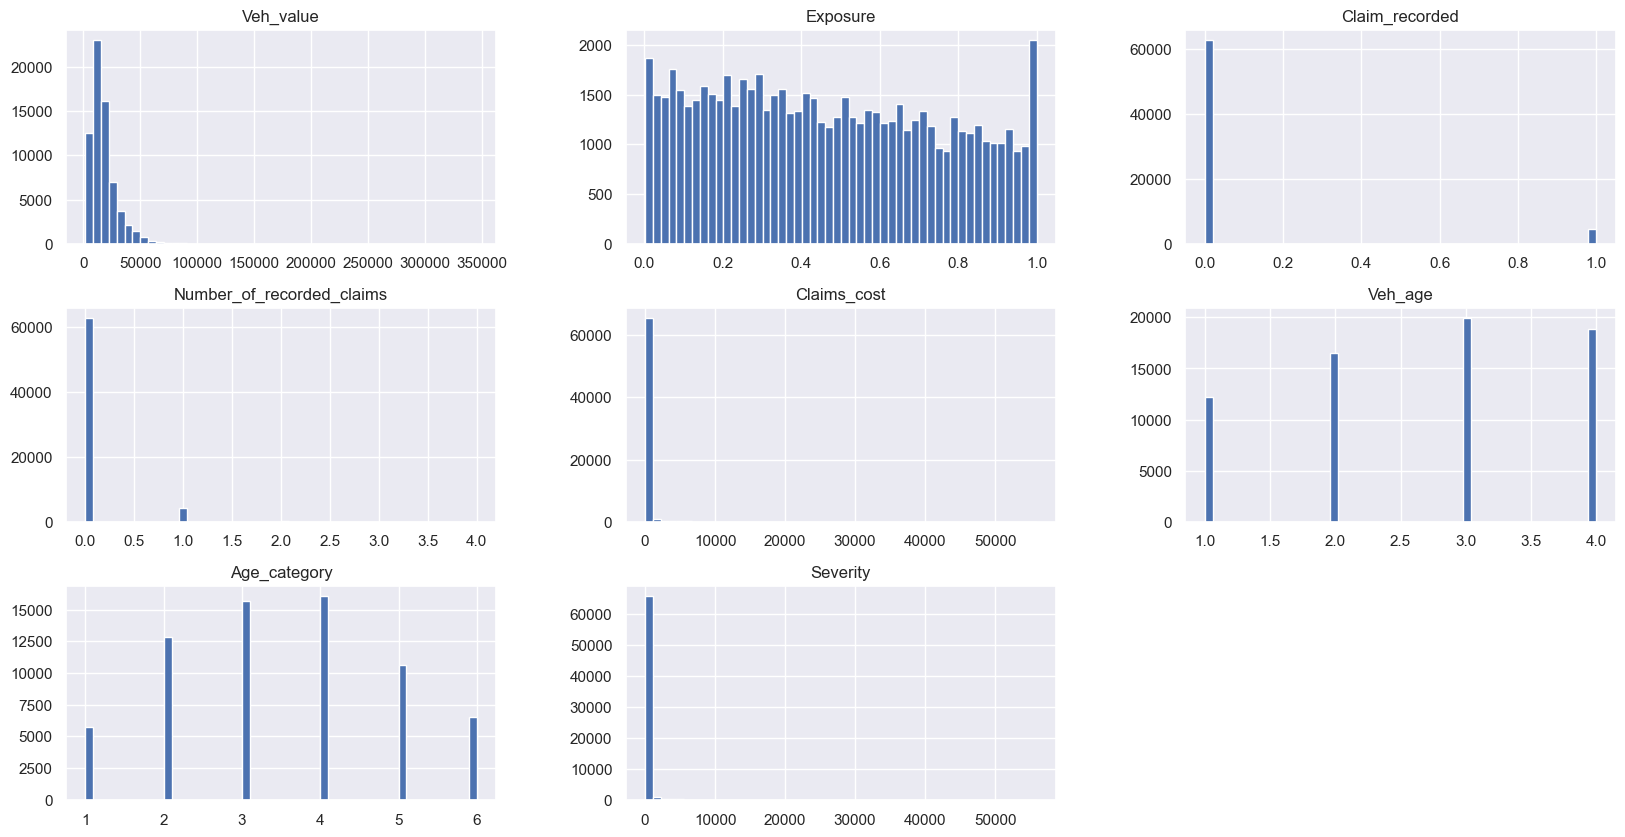

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_copy.hist(bins=50, figsize=(20,10))
plt.show()

*Insights Numerical Features*

*Categotical Features*  

In [17]:
df_copy.describe(include="object")

,Veh_body,Gender,Area
count,67426,67426,67426
unique,13,2,6
top,SEDAN,F,C
freq,22106,38344,20394


*Visualzing Categotical Features*

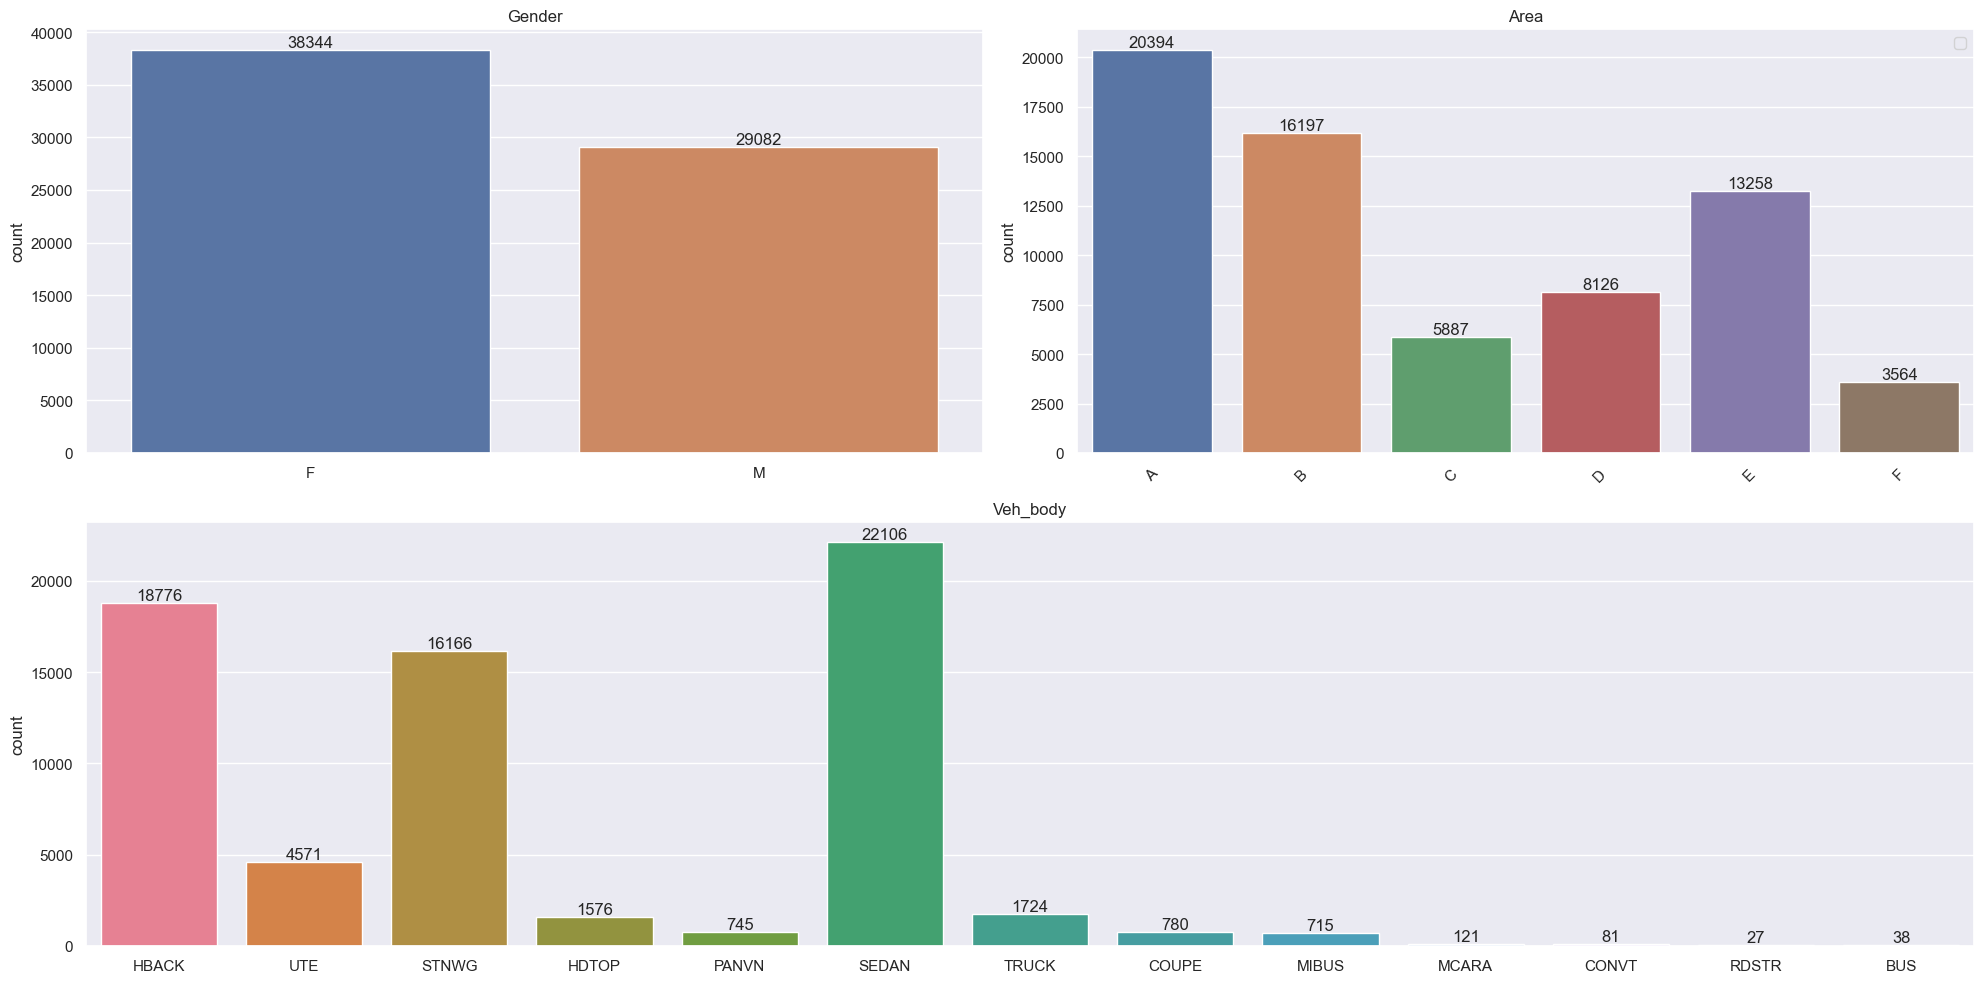

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=df_copy, x="Gender", ax=ax1,hue='Gender')
ax1.set_title("Gender")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(gs[0, 1])
Area_order=['A','B','C','D','E','F']
sns.countplot(data=df_copy, x="Area", ax=ax2,hue='Area')
ax2.set_xticklabels(Area_order, rotation=45)
ax2.legend("")
ax2.set_title("Area")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, :])
sns.countplot(data=df_copy, x="Veh_body", ax=ax3,hue='Veh_body')
ax3.set_title("Veh_body")
ax3.set_xlabel("")
for container in ax3.containers:
    ax3.bar_label(container)   

plt.tight_layout()
plt.show()

*Insights Categotical Features*

*we can see that some features are numerical, but thay can also be treated as categorical ,we weill deal weith them by appying groub_by*

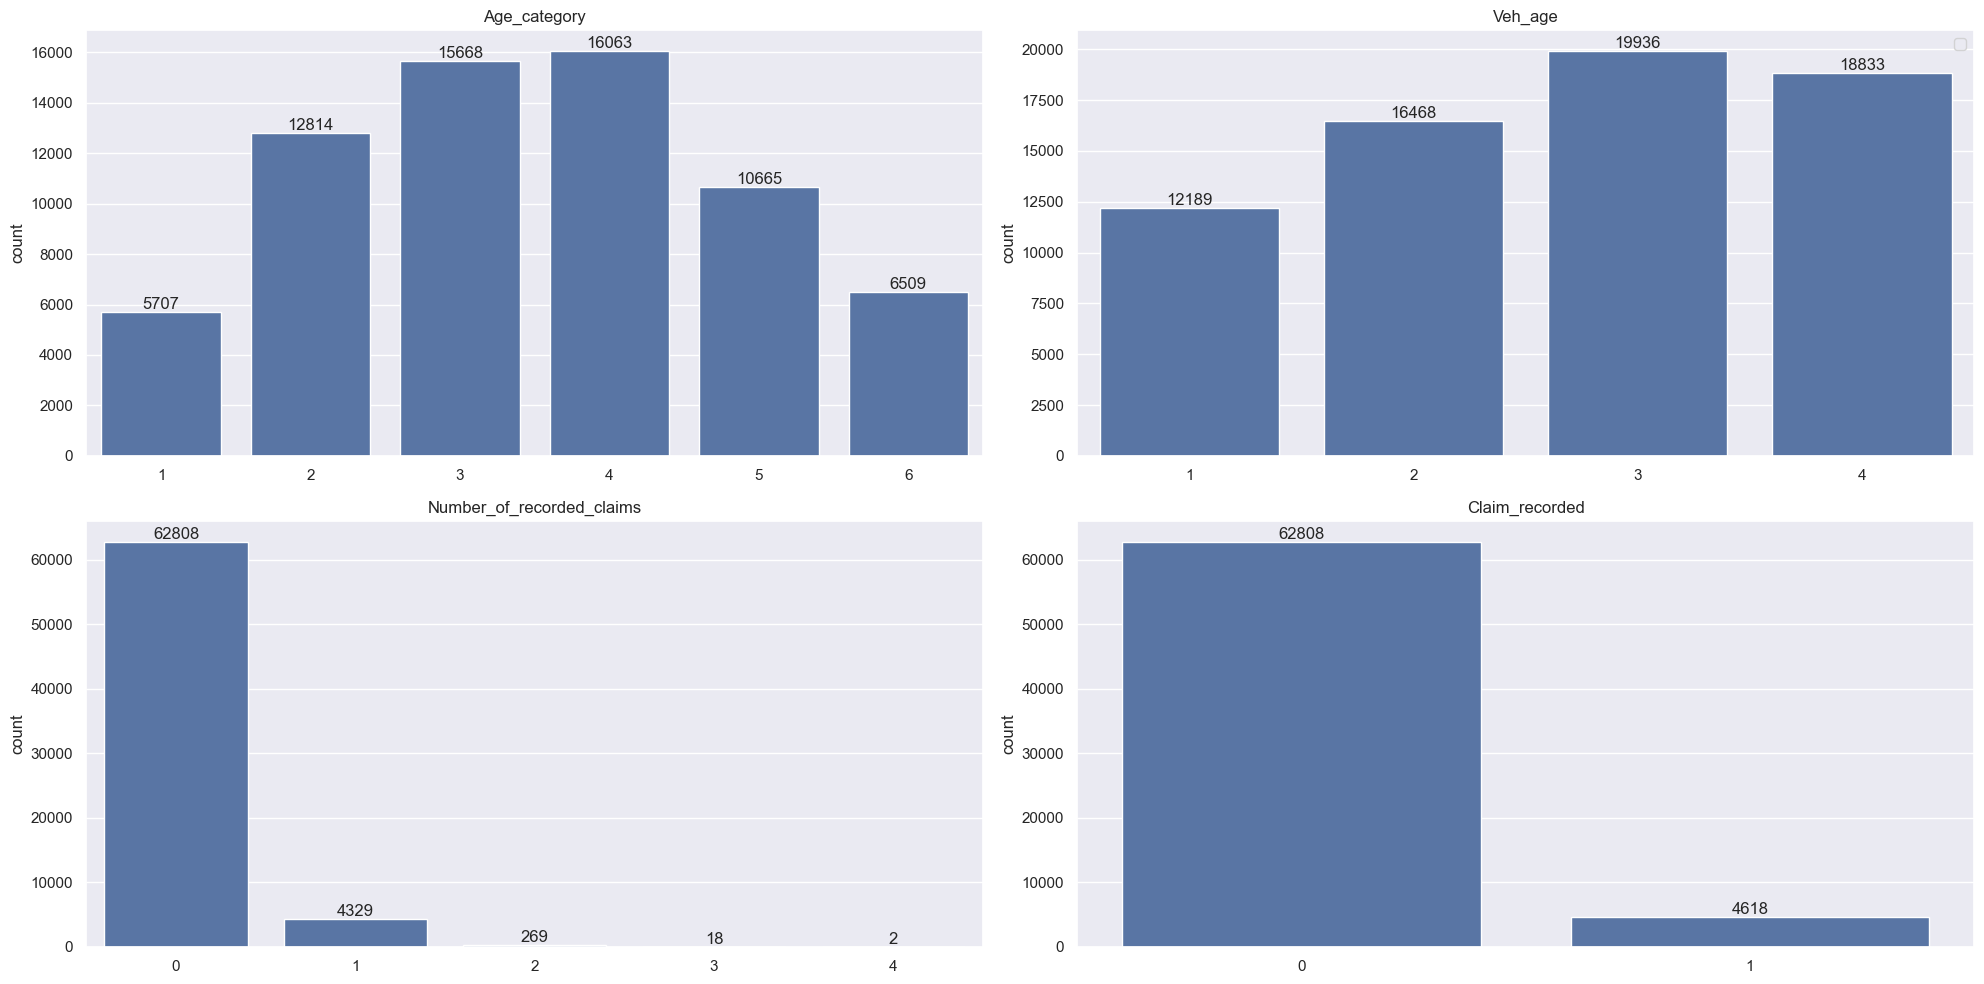

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=df_copy.groupby('Age_category')['Age_category'].value_counts().to_frame().reset_index(),
            x="Age_category",y="count",ax=ax1)
ax1.set_title("Age_category")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(gs[0, 1])
Area_order=['A','B','C','D','E','F']
sns.barplot(data=df_copy.groupby('Veh_age')['Veh_age'].value_counts().to_frame().reset_index(),
            x="Veh_age",y="count",ax=ax2)
ax2.legend("")
ax2.set_title("Veh_age")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(data=df_copy.groupby('Number_of_recorded_claims')['Number_of_recorded_claims'].value_counts().to_frame().reset_index(),
            x="Number_of_recorded_claims",y="count",ax=ax3)
ax3.set_title("Number_of_recorded_claims")
ax3.set_xlabel("")
for container in ax3.containers:
    ax3.bar_label(container) 

ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(data=df_copy.groupby('Claim_recorded')['Claim_recorded'].value_counts().to_frame().reset_index(),
            x="Claim_recorded",y="count",ax=ax4)
ax4.set_title("Claim_recorded")
ax4.set_xlabel("")
for container in ax4.containers:
    ax4.bar_label(container)        

plt.tight_layout()
plt.show()

---
## *Inferential Data Analysis*

*We will focus only on the feature [Claim_recorded] as target feature*

*1. Chi-square test*

In [20]:
from scipy.stats import chi2_contingency,spearmanr,mannwhitneyu

* *chi2_contingency --> categorical predictor vs binary target :*

In [21]:
contingency_table_percentaage=pd.crosstab(df_copy["Claim_recorded"],df_copy["Gender"],normalize=True)
contingency_table_percentaage

Gender,F,M
Claim_recorded,,
0,0.529425,0.402085
1,0.039258,0.029232


W = 0.391, p = 0.532
Fail to reject H₀ → No significant association


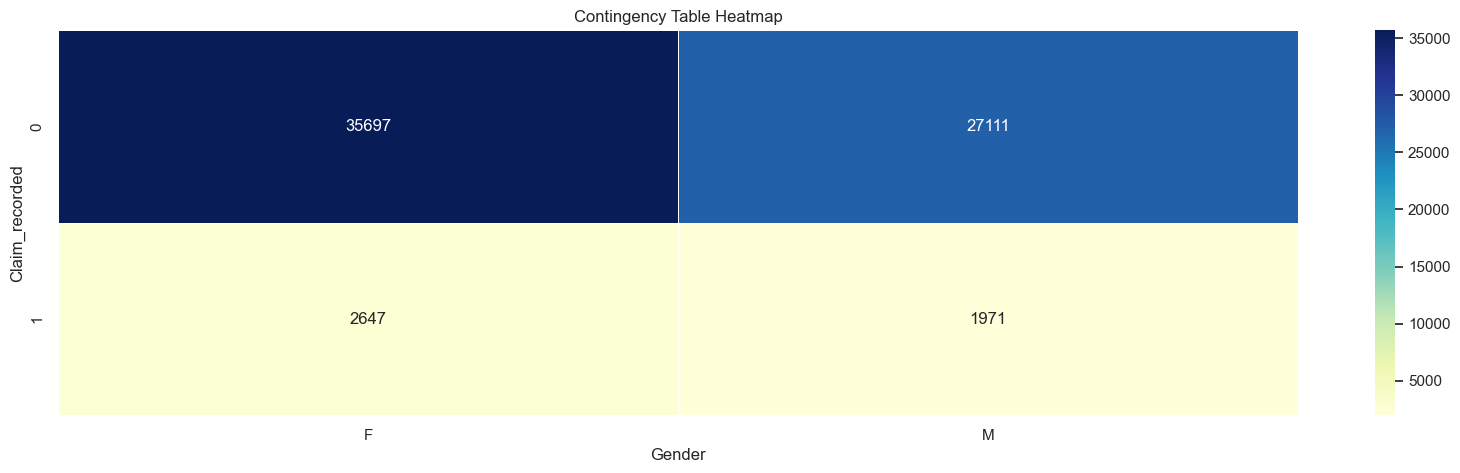

In [22]:
contingency_table=pd.crosstab(df_copy["Claim_recorded"],df_copy["Gender"])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
print(f"W = {chi2:.3f}, p = {p_chi:.3f}")
if p_chi < 0.05:
    print("Reject H₀ → There is significant association")
else:
    print("Fail to reject H₀ → No significant association")
plt.figure(figsize=(20,5))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title('Contingency Table Heatmap')
plt.show()

In [23]:
contingency_table_percentaage=pd.crosstab(df_copy["Claim_recorded"],df_copy["Area"],normalize=True)
contingency_table_percentaage

Area,A,B,C,D,E,F
Claim_recorded,,,,,,
0,0.224157,0.182348,0.281523,0.113176,0.081601,0.048705
1,0.016062,0.014282,0.020941,0.007341,0.005710,0.004153


W = 18.278, p = 0.003
Reject H₀ → There is significant association


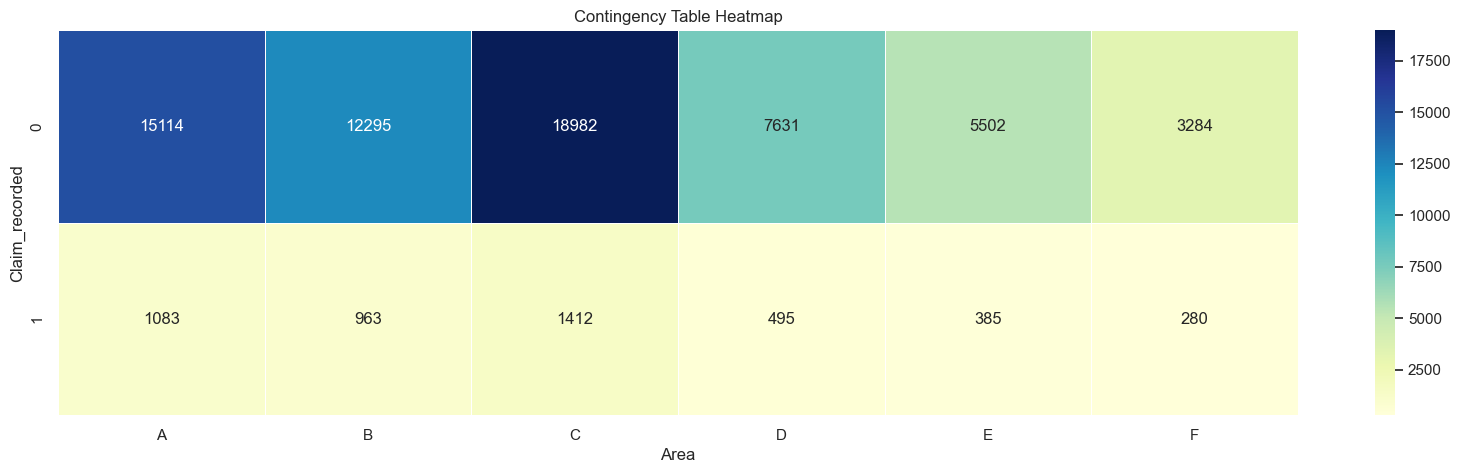

In [24]:
contingency_table=pd.crosstab(df_copy["Claim_recorded"],df_copy["Area"])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
print(f"W = {chi2:.3f}, p = {p_chi:.3f}")
if p_chi < 0.05:
    print("Reject H₀ → There is significant association")
else:
    print("Fail to reject H₀ → No significant association")
plt.figure(figsize=(20,5))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title('Contingency Table Heatmap')
plt.show()


W = 40.815, p = 0.000
Reject H₀ → There is significant association


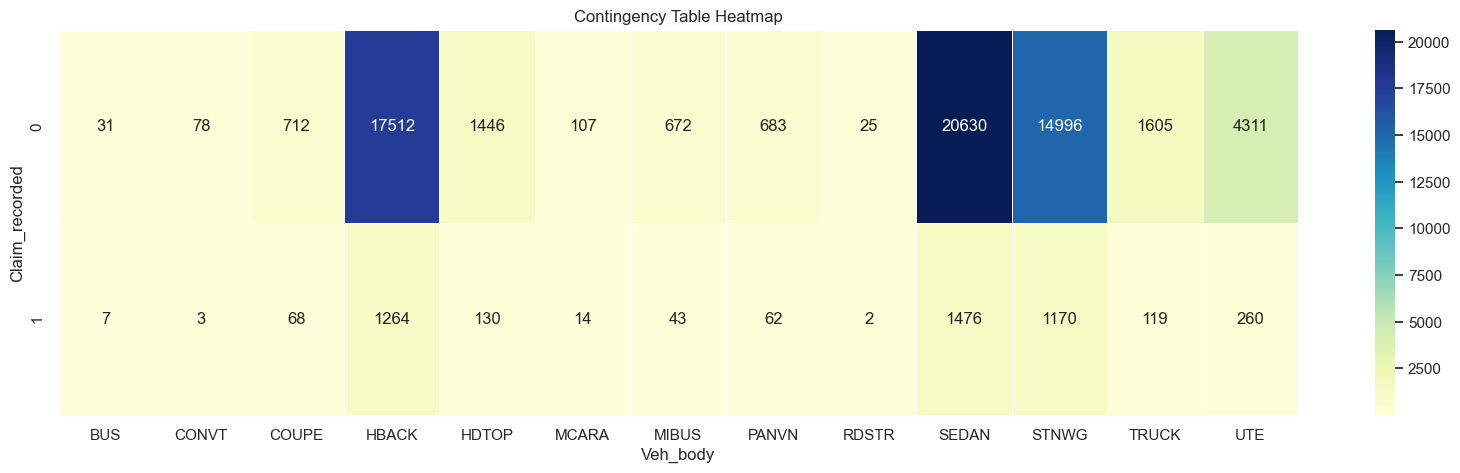

In [25]:
contingency_table=pd.crosstab(df_copy["Claim_recorded"],df_copy["Veh_body"])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
print(f"W = {chi2:.3f}, p = {p_chi:.3f}")
if p_chi < 0.05:
    print("Reject H₀ → There is significant association")
else:
    print("Fail to reject H₀ → No significant association")
plt.figure(figsize=(20,5))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title('Contingency Table Heatmap')
plt.show()

*2. Spearman correlation*

* *Spearman’s rank correlation (ordinal predictor vs binary target)*

In [46]:
spearman_corr, p_spear = spearmanr(df_copy["Claim_recorded"], df_copy["Age_category"])
print(f"W = {spearman_corr:.3f}, p = {p_spear:.3f}")
if p_spear < 0.05:
    print("Reject H₀ → There is significant monotonic relationship")
else:
    print("Fail to reject H₀ → No significant monotonic relationship")

W = -0.030, p = 0.000
Reject H₀ → There is significant monotonic relationship


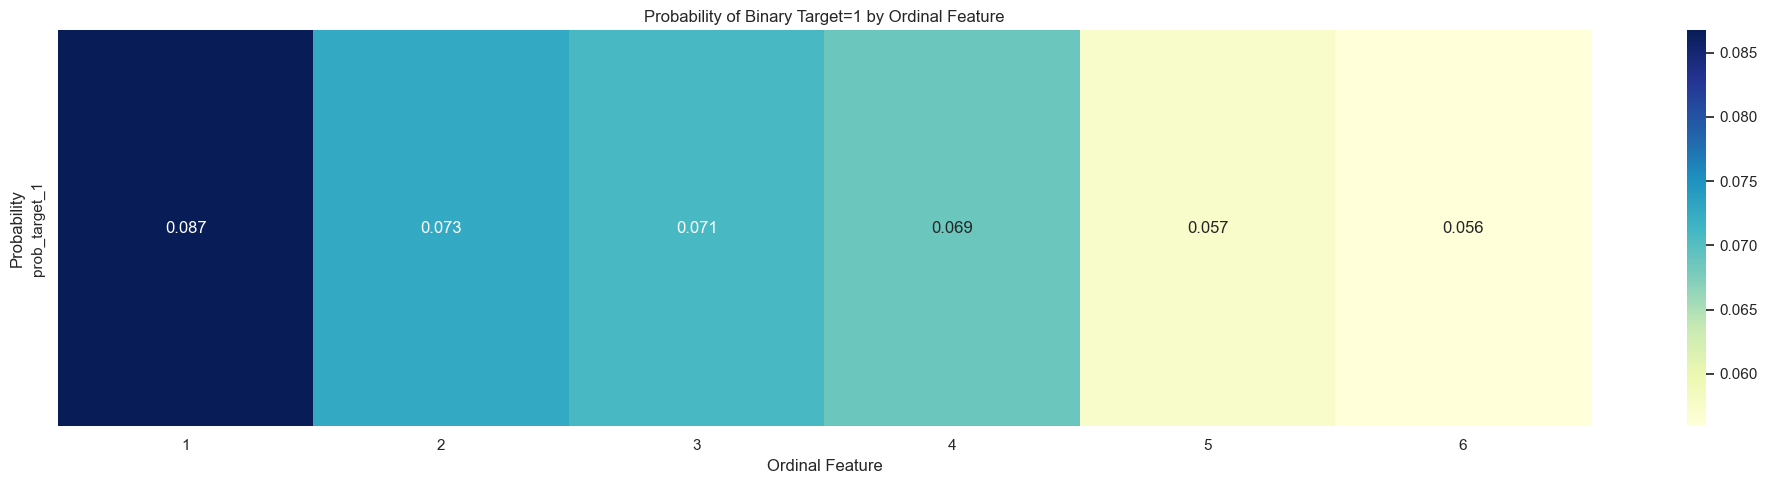

In [47]:
prob_df = df.groupby('Age_category')['Claim_recorded'].mean().reset_index()
prob_df.rename(columns={'Claim_recorded': 'prob_target_1'}, inplace=True)
plt.figure(figsize=(20,5))
ax=sns.heatmap(prob_df.set_index('Age_category').T, annot=True, cmap="YlGnBu", cbar=True)
ax.set_title("Probability of Binary Target=1 by Ordinal Feature")
ax.set_xlabel("Ordinal Feature")
ax.set_ylabel("Probability")
plt.tight_layout()
plt.show()

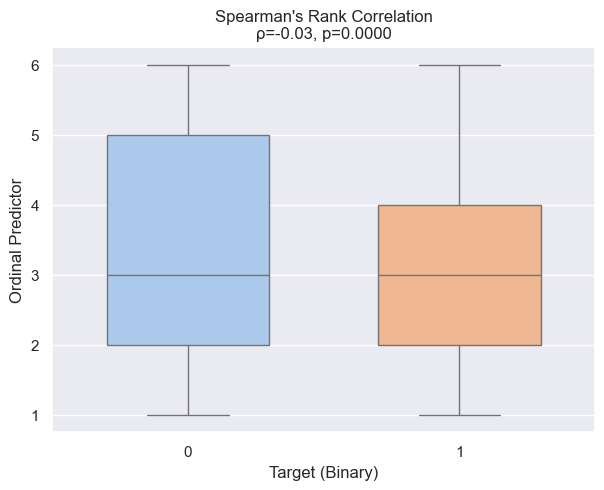

In [27]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Claim_recorded", y="Age_category", data=df_copy, palette="pastel", width=0.6)
#sns.swarmplot(x="Claim_recorded", y="Age_category", data=df_copy, color=".25", size=6)
plt.title(f"Spearman's Rank Correlation\nρ={spearman_corr:.2f}, p={p_spear:.4f}")
plt.xlabel("Target (Binary)")
plt.ylabel("Ordinal Predictor")
#plt.ylim(0.5, 5.5)  # Keep ordinal scale clear
plt.show()

In [44]:
spearman_corr, p_spear = spearmanr(df_copy["Claim_recorded"], df_copy["Number_of_recorded_claims"])
print(f"W = {spearman_corr:.3f}, p = {p_spear:.3f}")
if p_spear < 0.05:
    print("Reject H₀ → There is significant monotonic relationship")
else:
    print("Fail to reject H₀ → No significant monotonic relationship")

W = 1.000, p = 0.000
Reject H₀ → There is significant monotonic relationship


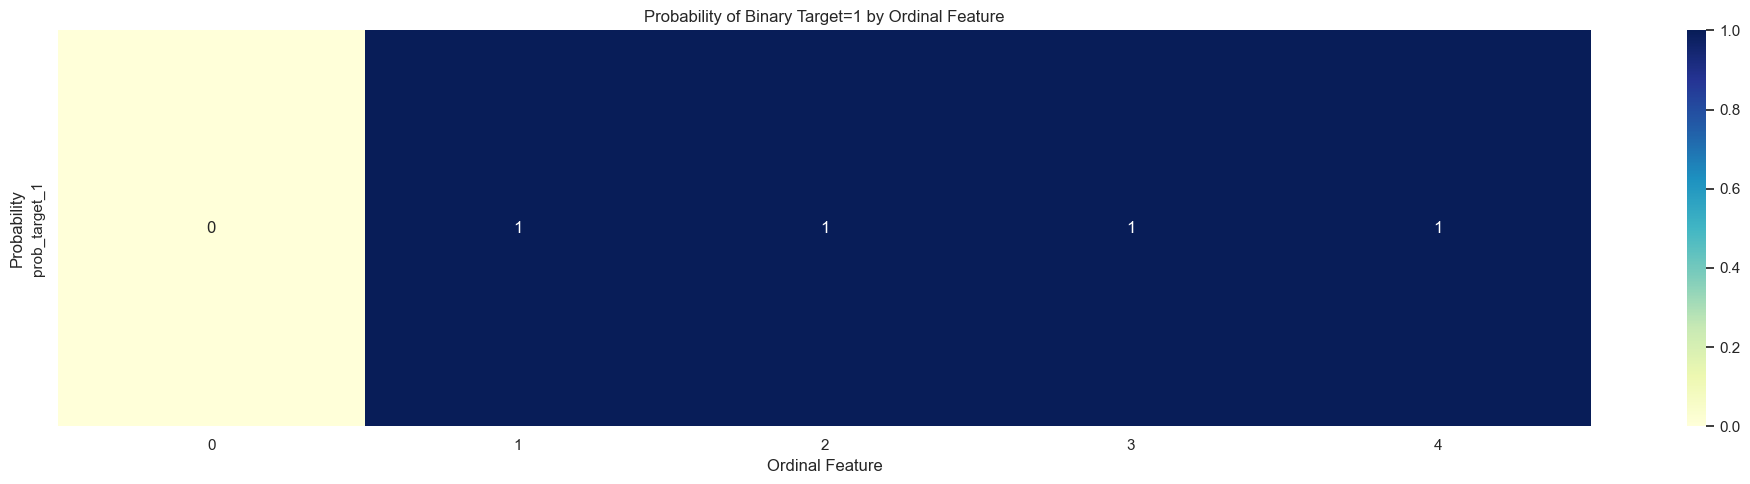

In [45]:
prob_df = df.groupby('Number_of_recorded_claims')['Claim_recorded'].mean().reset_index()
prob_df.rename(columns={'Claim_recorded': 'prob_target_1'}, inplace=True)
plt.figure(figsize=(20,5))
ax=sns.heatmap(prob_df.set_index('Number_of_recorded_claims').T, annot=True, cmap="YlGnBu", cbar=True)
ax.set_title("Probability of Binary Target=1 by Ordinal Feature")
ax.set_xlabel("Ordinal Feature")
ax.set_ylabel("Probability")
plt.tight_layout()
plt.show()

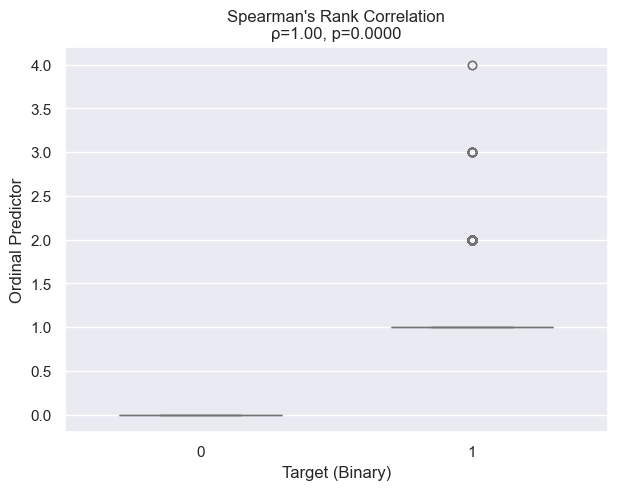

In [35]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Claim_recorded", y="Number_of_recorded_claims", data=df_copy, palette="pastel", width=0.6)
#sns.swarmplot(x="Claim_recorded", y="Age_category", data=df_copy, color=".25", size=6)
plt.title(f"Spearman's Rank Correlation\nρ={spearman_corr:.2f}, p={p_spear:.4f}")
plt.xlabel("Target (Binary)")
plt.ylabel("Ordinal Predictor")
#plt.ylim(0.5, 5.5)  # Keep ordinal scale clear
plt.show()

In [40]:
spearman_corr, p_spear = spearmanr(df_copy["Claim_recorded"], df_copy["Veh_age"])
print(f"W = {spearman_corr:.3f}, p = {p_spear:.3f}")
if p_spear < 0.05:
    print("Reject H₀ → There is significant monotonic relationship")
else:
    print("Fail to reject H₀ → No significant monotonic relationship")

W = -0.013, p = 0.000
Reject H₀ → There is significant monotonic relationship


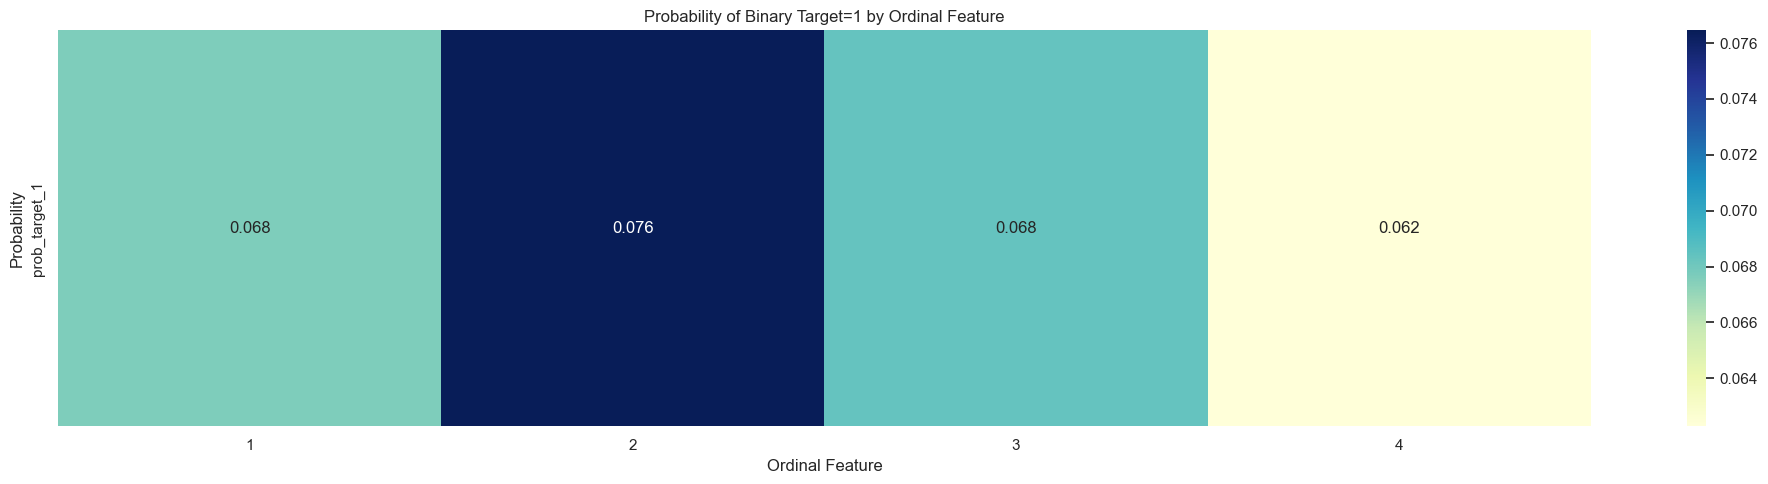

In [43]:
prob_df = df.groupby('Veh_age')['Claim_recorded'].mean().reset_index()
prob_df.rename(columns={'Claim_recorded': 'prob_target_1'}, inplace=True)
plt.figure(figsize=(20,5))
ax=sns.heatmap(prob_df.set_index('Veh_age').T, annot=True, cmap="YlGnBu", cbar=True)
ax.set_title("Probability of Binary Target=1 by Ordinal Feature")
ax.set_xlabel("Ordinal Feature")
ax.set_ylabel("Probability")
plt.tight_layout()
plt.show()

*3. Mann–Whitney U test*

* *Mann–Whitney U test (numerical predictor vs binary target)*

In [48]:
group1 = df_copy["Claims_cost"][df_copy["Claim_recorded"] == 0]
group2 = df_copy["Claims_cost"][df_copy["Claim_recorded"]  == 1]
u_stat, p_mw = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"W = {u_stat:.3f}, p = {p_mw:.3f}")
if p_mw < 0.05:
    print("Reject H₀ → There is significant distribution difference.")
else:
    print("Fail to reject H₀ → No significant distribution difference.")

W = 0.000, p = 0.000
Reject H₀ → There is significant distribution difference.


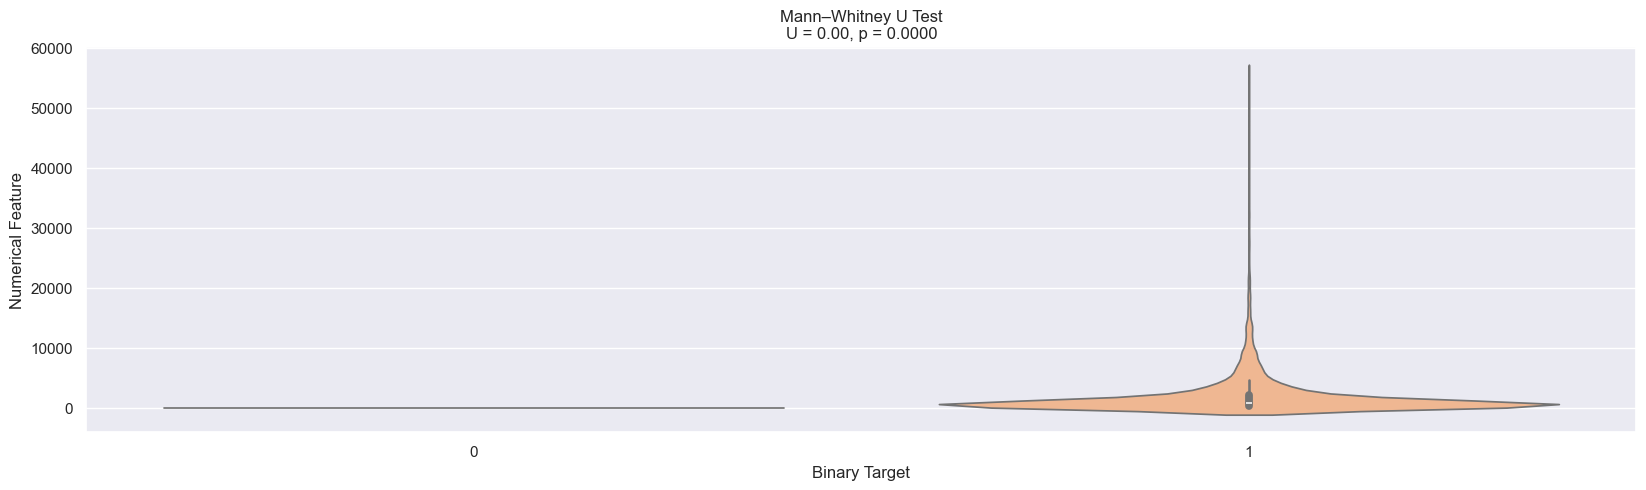

In [60]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Claim_recorded', y='Claims_cost', data=df_copy, inner="box", palette="pastel")
#sns.swarmplot(x='Claim_recorded', y='Claims_cost', data=df, color=".25")
plt.title(f"Mann–Whitney U Test\nU = {u_stat:.2f}, p = {p_mw:.4f}")
plt.xlabel("Binary Target")
plt.ylabel("Numerical Feature")
plt.show()

In [61]:
group1 = df_copy["Exposure"][df_copy["Claim_recorded"] == 0]
group2 = df_copy["Exposure"][df_copy["Claim_recorded"]  == 1]
u_stat, p_mw = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"W = {u_stat:.3f}, p = {p_mw:.3f}")
if p_mw < 0.05:
    print("Reject H₀ → There is significant distribution difference.")
else:
    print("Fail to reject H₀ → No significant distribution difference.")

W = 100401011.500, p = 0.000
Reject H₀ → There is significant distribution difference.


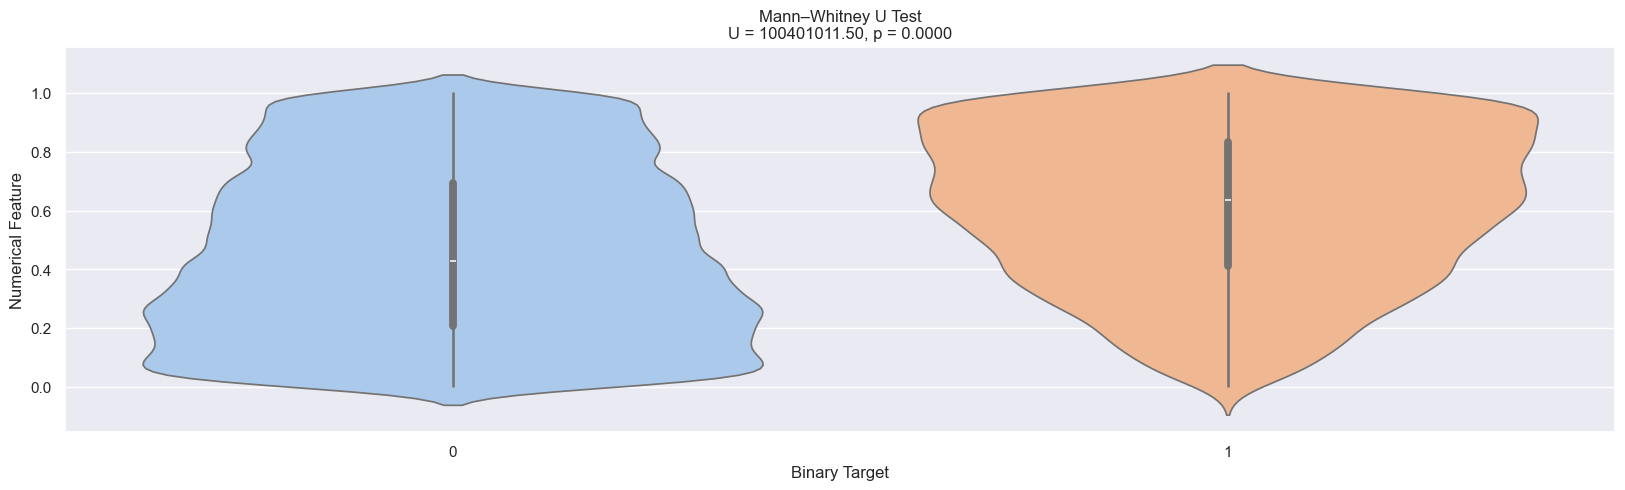

In [62]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Claim_recorded', y='Exposure', data=df_copy, inner="box", palette="pastel")
#sns.swarmplot(x='Claim_recorded', y='Claims_cost', data=df, color=".25")
plt.title(f"Mann–Whitney U Test\nU = {u_stat:.2f}, p = {p_mw:.4f}")
plt.xlabel("Binary Target")
plt.ylabel("Numerical Feature")
plt.show()

In [63]:
group1 = df_copy["Severity"][df_copy["Claim_recorded"] == 0]
group2 = df_copy["Severity"][df_copy["Claim_recorded"]  == 1]
u_stat, p_mw = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"W = {u_stat:.3f}, p = {p_mw:.3f}")
if p_mw < 0.05:
    print("Reject H₀ → There is significant distribution difference.")
else:
    print("Fail to reject H₀ → No significant distribution difference.")

W = 0.000, p = 0.000
Reject H₀ → There is significant distribution difference.


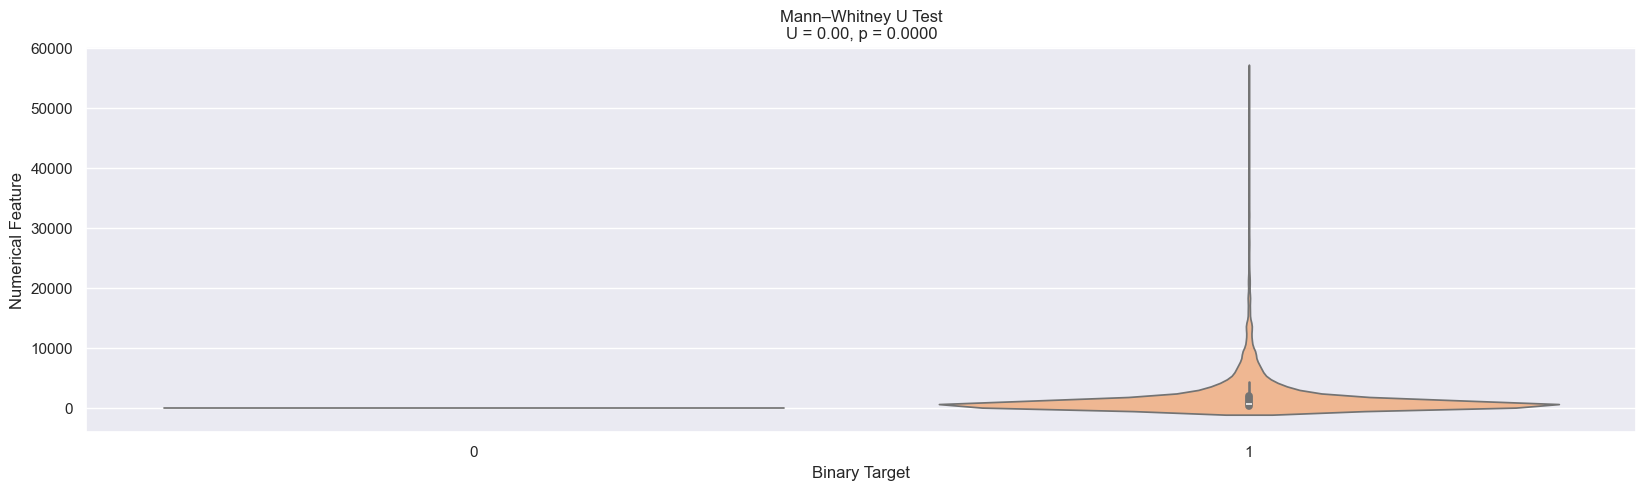

In [64]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Claim_recorded', y='Severity', data=df_copy, inner="box", palette="pastel")
#sns.swarmplot(x='Claim_recorded', y='Claims_cost', data=df, color=".25")
plt.title(f"Mann–Whitney U Test\nU = {u_stat:.2f}, p = {p_mw:.4f}")
plt.xlabel("Binary Target")
plt.ylabel("Numerical Feature")
plt.show()

In [65]:
group1 = df_copy["Veh_value"][df_copy["Claim_recorded"] == 0]
group2 = df_copy["Veh_value"][df_copy["Claim_recorded"]  == 1]
u_stat, p_mw = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"W = {u_stat:.3f}, p = {p_mw:.3f}")
if p_mw < 0.05:
    print("Reject H₀ → There is significant distribution difference.")
else:
    print("Fail to reject H₀ → No significant distribution difference.")

W = 136037026.500, p = 0.000
Reject H₀ → There is significant distribution difference.


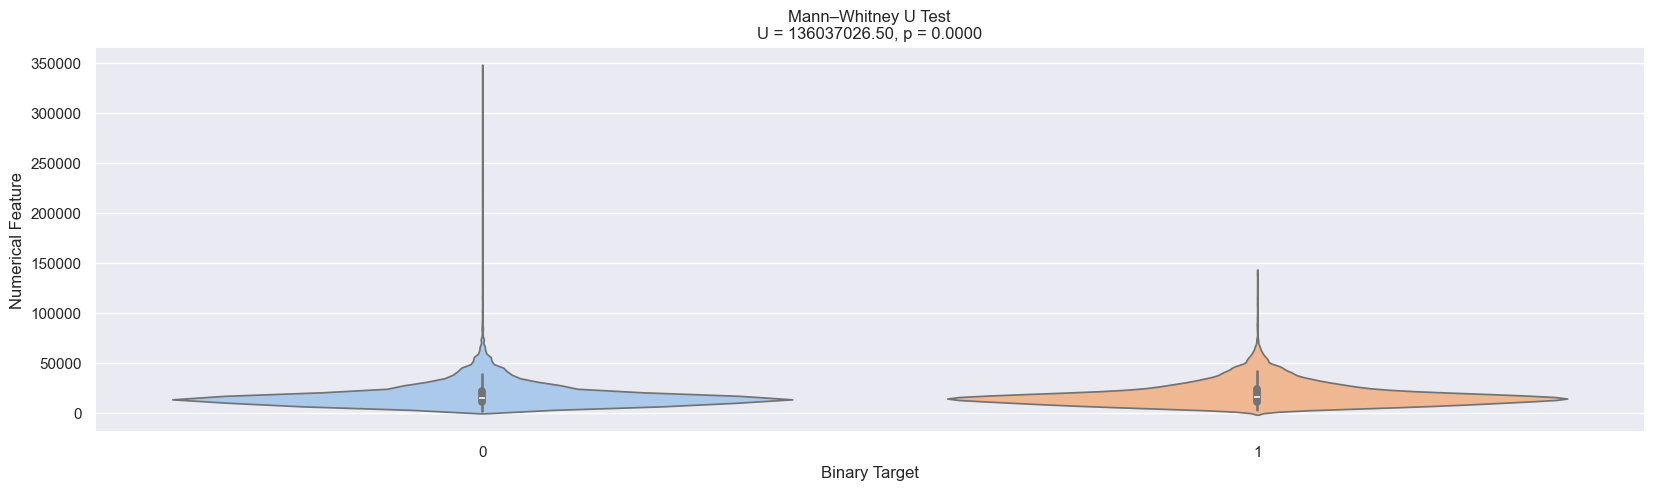

In [66]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Claim_recorded', y='Veh_value', data=df_copy, inner="box", palette="pastel")
#sns.swarmplot(x='Claim_recorded', y='Claims_cost', data=df, color=".25")
plt.title(f"Mann–Whitney U Test\nU = {u_stat:.2f}, p = {p_mw:.4f}")
plt.xlabel("Binary Target")
plt.ylabel("Numerical Feature")
plt.show()